In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
rutaArchivo = 'D:\criss\Documents\Alex\ciclo 7\Inteligencia Artificial\Mall_Customers-2.csv'

In [3]:
df = pd.read_csv(rutaArchivo, index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
df.rename({'Annual Income (k$)':'Ingreso', 'Spending Score (1-100)':'Ponderacion'}, axis=1, inplace=True)
df.head()

,Gender,Age,Ingreso,Ponderacion
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
# Si ingreso < 50 Entonces 'Ingreso bajo'
# Si 50 <= ingreso <= 90 entonces 'Ingreso moderado'
# Si ingreso > 90 'Ingreso alto'

In [7]:
df['Segmento'] = np.where(df.Ingreso >= 90, 'Ingreso alto',
                         np.where(df.Ingreso <50, 'Ingreso bajo', 'Ingreso moderado'))

In [8]:
df

,Gender,Age,Ingreso,Ponderacion,Segmento
CustomerID,,,,,
1,Male,19,15,39,Ingreso bajo
2,Male,21,15,81,Ingreso bajo
3,Female,20,16,6,Ingreso bajo
4,Female,23,16,77,Ingreso bajo
5,Female,31,17,40,Ingreso bajo
...,...,...,...,...,...
196,Female,35,120,79,Ingreso alto
197,Female,45,126,28,Ingreso alto
198,Male,32,126,74,Ingreso alto


In [9]:
df.describe()

,Age,Ingreso,Ponderacion
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [10]:
df.groupby('Segmento').size()

Segmento
Ingreso alto         22
Ingreso bajo         72
Ingreso moderado    106
dtype: int64

In [11]:
df.groupby('Gender').size()

Gender
Female    112
Male       88
dtype: int64

In [12]:
df.groupby(['Segmento', 'Gender']).size()

Segmento          Gender
Ingreso alto      Female    13
                  Male       9
Ingreso bajo      Female    43
                  Male      29
Ingreso moderado  Female    56
                  Male      50
dtype: int64

In [13]:
train, test = train_test_split(df, test_size = 0.4, stratify = df[['Segmento', 'Gender']], random_state=42)
train.head(5)

,Gender,Age,Ingreso,Ponderacion,Segmento
CustomerID,,,,,
18,Male,20,21,66,Ingreso bajo
198,Male,32,126,74,Ingreso alto
86,Male,48,54,46,Ingreso moderado
84,Female,46,54,44,Ingreso moderado
3,Female,20,16,6,Ingreso bajo


In [14]:
train

,Gender,Age,Ingreso,Ponderacion,Segmento
CustomerID,,,,,
18,Male,20,21,66,Ingreso bajo
198,Male,32,126,74,Ingreso alto
86,Male,48,54,46,Ingreso moderado
84,Female,46,54,44,Ingreso moderado
3,Female,20,16,6,Ingreso bajo
...,...,...,...,...,...
39,Female,36,37,26,Ingreso bajo
194,Female,38,113,91,Ingreso alto
147,Male,48,77,36,Ingreso moderado


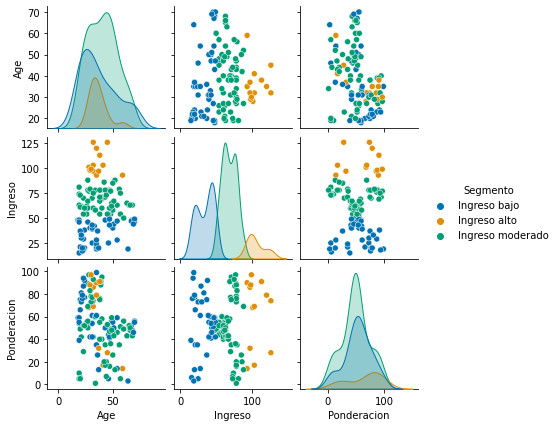

In [15]:
#Diagrama de dispersion de los atributos emparejados
sns.pairplot(train, hue='Segmento', height=2, palette='colorblind');

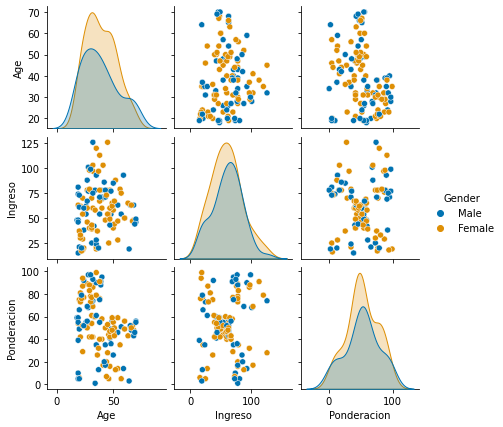

In [16]:
#Diagrama de dispersion de los atributos emparejados
sns.pairplot(train, hue='Gender', height=2, palette='colorblind');

In [17]:
# Separacion objetivo - explicativas de cada grupo
# grupo entrenamiento 
X_train = train[['Age','Ingreso', 'Ponderacion']]
y_train = train[['Segmento', 'Gender']]
# grupo prueba
X_test = test[['Age','Ingreso', 'Ponderacion']]
y_test = test[['Segmento', 'Gender']]
# Mostrar los primeros valores
print(X_train.head(5))
print(y_train.head(5))
print(len(y_test))

            Age  Ingreso  Ponderacion
CustomerID                           
18           20       21           66
198          32      126           74
86           48       54           46
84           46       54           44
3            20       16            6
                    Segmento  Gender
CustomerID                          
18              Ingreso bajo    Male
198             Ingreso alto    Male
86          Ingreso moderado    Male
84          Ingreso moderado  Female
3               Ingreso bajo  Female
80


In [18]:
# Creacion del modelo del arbo de decision
mod_dt = DecisionTreeClassifier(max_depth=3, random_state=1)
mod_dt.fit(X_train, y_train)
prediccion = mod_dt.predict(X_test)


In [19]:
y_test

,Segmento,Gender
CustomerID,,
171,Ingreso moderado,Male
185,Ingreso alto,Female
148,Ingreso moderado,Female
87,Ingreso moderado,Female
138,Ingreso moderado,Male
...,...,...
85,Ingreso moderado,Female
78,Ingreso moderado,Male
2,Ingreso bajo,Male


In [20]:
prediccion

array([['Ingreso moderado', 'Female'],
       ['Ingreso alto', 'Female'],
       ['Ingreso moderado', 'Female'],
       ['Ingreso moderado', 'Female'],
       ['Ingreso moderado', 'Female'],
       ['Ingreso moderado', 'Female'],
       ['Ingreso moderado', 'Female'],
       ['Ingreso moderado', 'Female'],
       ['Ingreso bajo', 'Female'],
       ['Ingreso moderado', 'Female'],
       ['Ingreso bajo', 'Female'],
       ['Ingreso bajo', 'Female'],
       ['Ingreso moderado', 'Female'],
       ['Ingreso moderado', 'Female'],
       ['Ingreso moderado', 'Female'],
       ['Ingreso moderado', 'Female'],
       ['Ingreso moderado', 'Female'],
       ['Ingreso bajo', 'Female'],
       ['Ingreso bajo', 'Female'],
       ['Ingreso moderado', 'Female'],
       ['Ingreso bajo', 'Female'],
       ['Ingreso bajo', 'Female'],
       ['Ingreso alto', 'Female'],
       ['Ingreso alto', 'Female'],
       ['Ingreso bajo', 'Female'],
       ['Ingreso moderado', 'Female'],
       ['Ingreso moderado', 'F

In [21]:
# Modulos para metricas de eficiencia del modelo 
from sklearn import metrics

In [22]:
# Verificacion de la precision del arbol
print('La precision del arbol de decision es: {:.3f}'.format(metrics.accuracy_score(prediccion, y_test)))

ValueError: multiclass-multioutput is not supported

In [23]:
mod_dt.feature_importances_

array([0.07670058, 0.89308519, 0.03021423])

In [24]:
mod_dt.feature_names_in_

array(['Age', 'Ingreso', 'Ponderacion'], dtype=object)

In [25]:
importancia_dt=pd.DataFrame({'Caracteristica':mod_dt.feature_names_in_,
                            'Importancia':mod_dt.feature_importances_})
importancia_dt

,Caracteristica,Importancia
0,Age,0.076701
1,Ingreso,0.893085
2,Ponderacion,0.030214


In [26]:
mod_dt.classes_

[array(['Ingreso alto', 'Ingreso bajo', 'Ingreso moderado'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

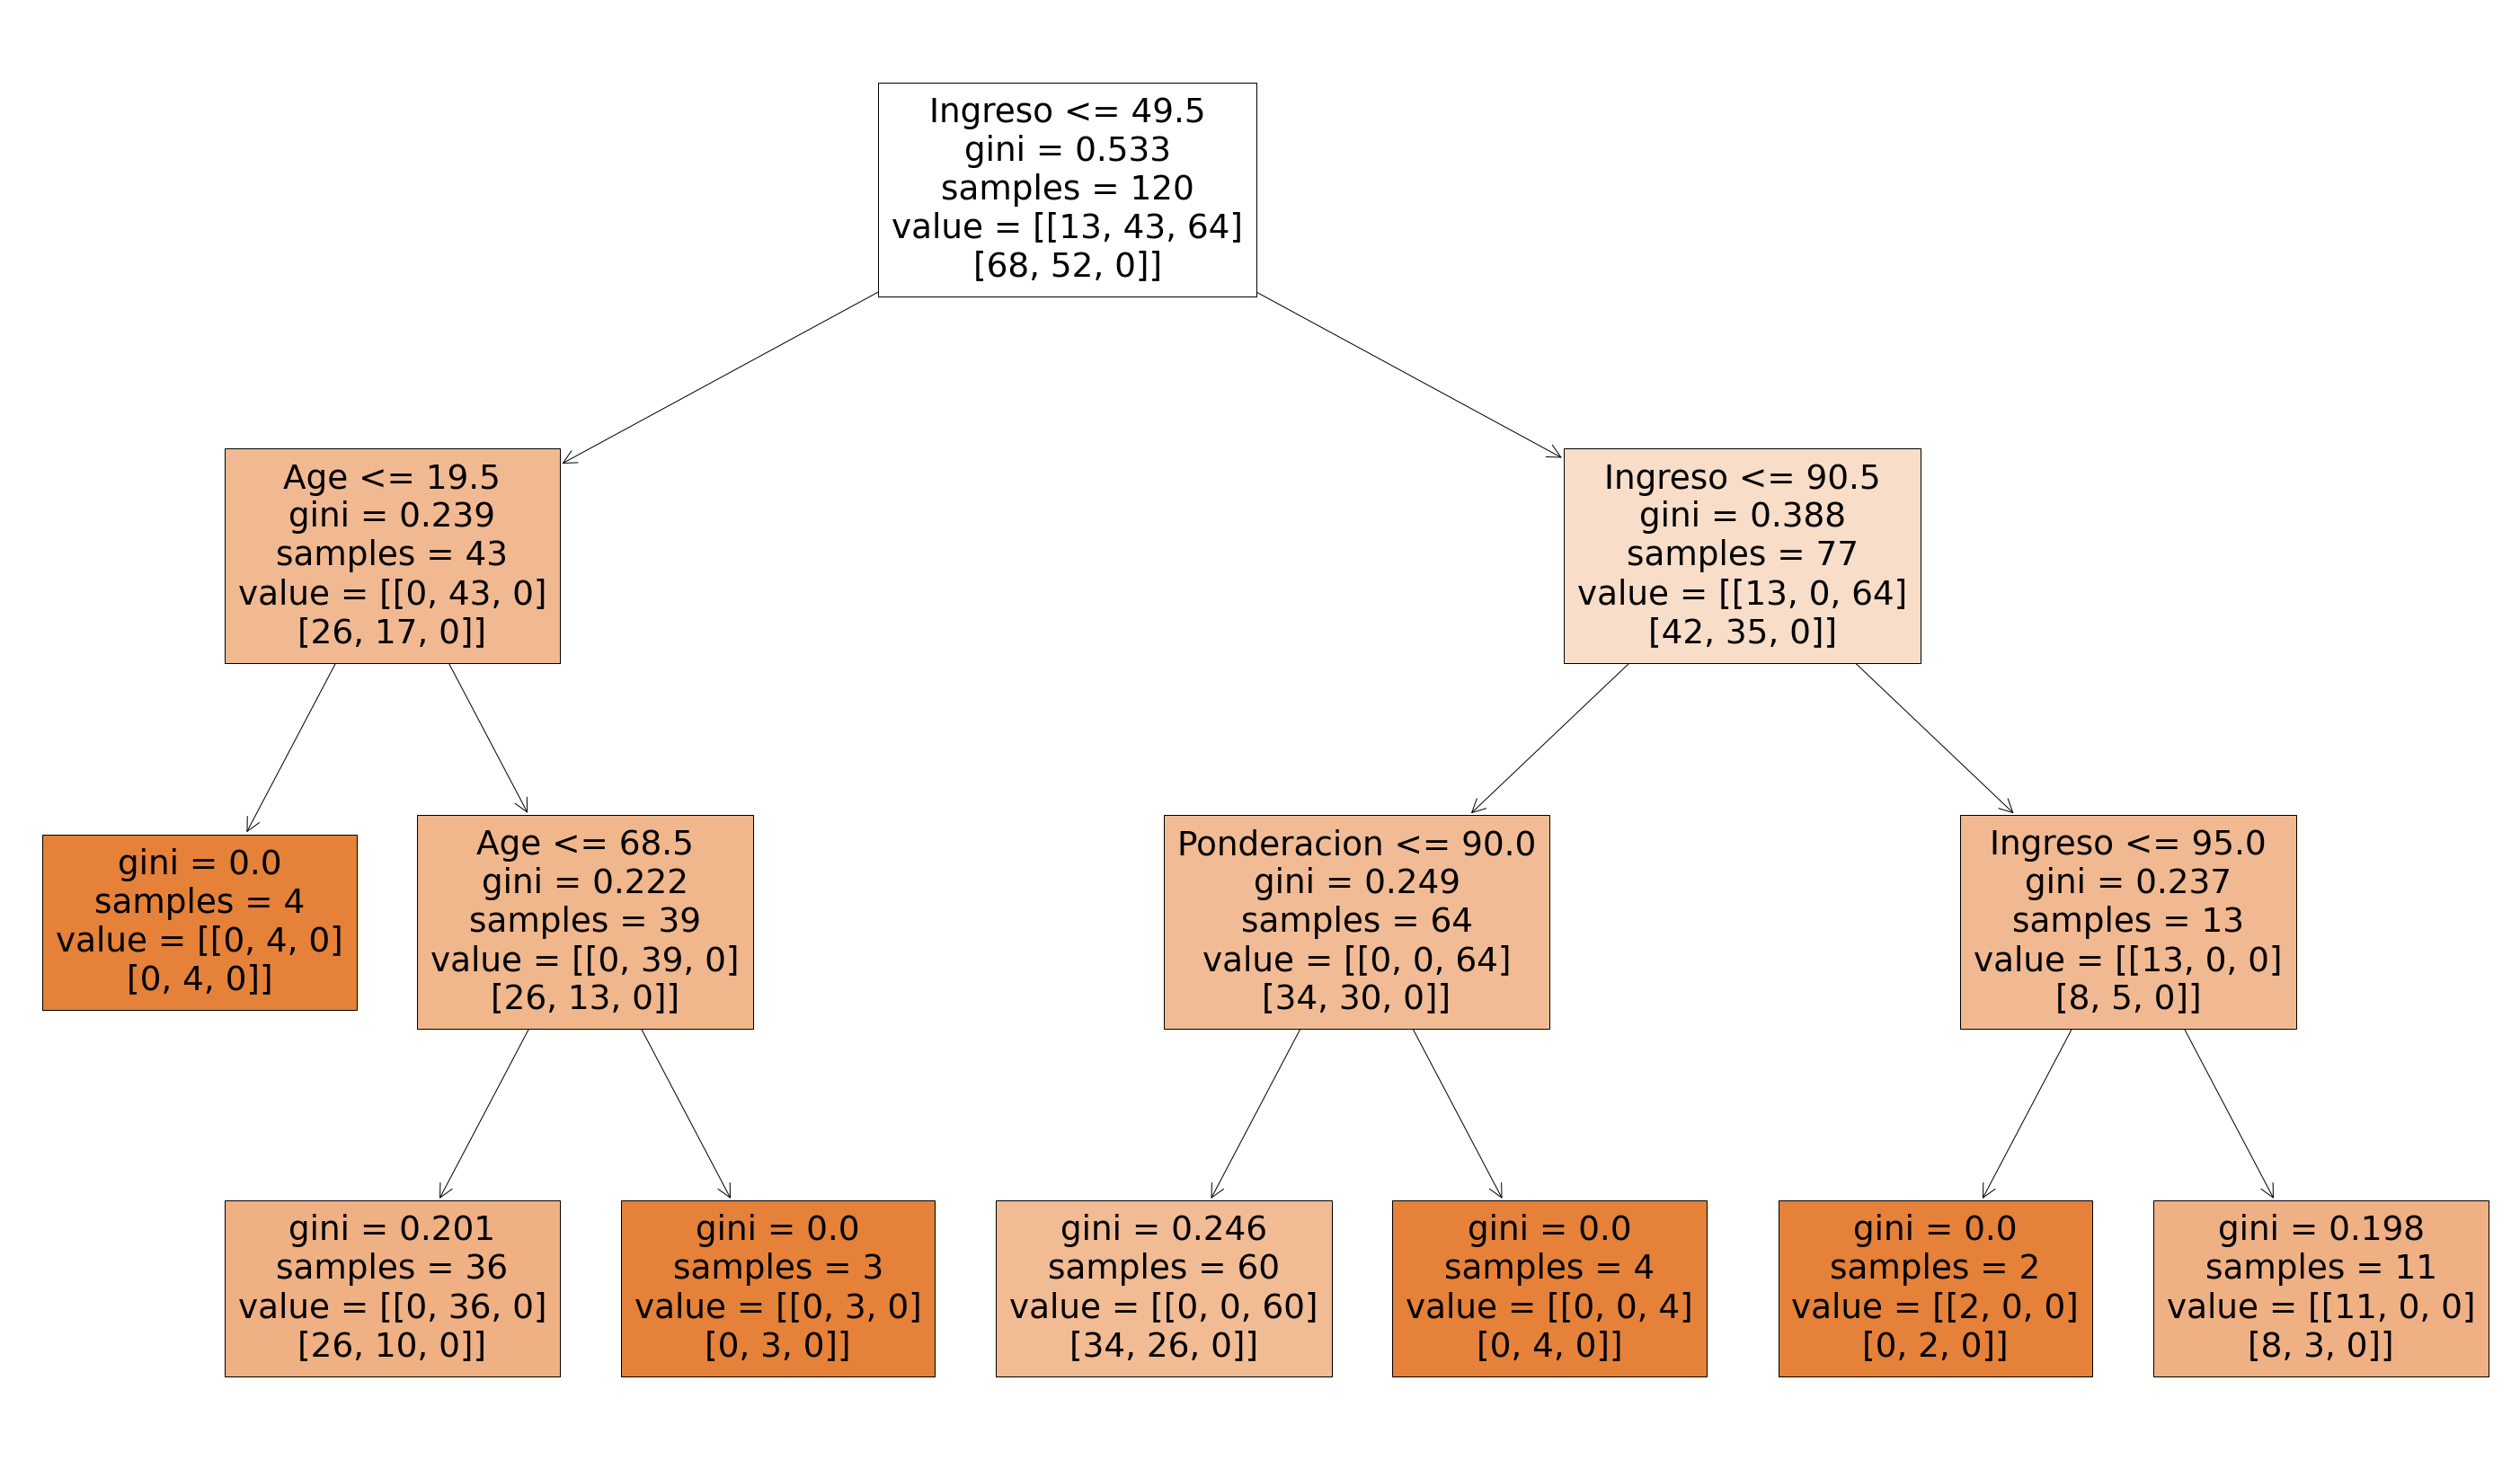

In [27]:
plt.figure(figsize=(50,30))
plot_tree(mod_dt, feature_names=mod_dt.feature_names_in_, class_names=mod_dt.classes_, filled=True);

In [28]:
mod_dt.n_classes_

array([3, 2], dtype=int64)

In [29]:
mod_dt.classes_

[array(['Ingreso alto', 'Ingreso bajo', 'Ingreso moderado'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [30]:
test.head(5)

,Gender,Age,Ingreso,Ponderacion,Segmento
CustomerID,,,,,
171,Male,40,87,13,Ingreso moderado
185,Female,41,99,39,Ingreso alto
148,Female,32,77,74,Ingreso moderado
87,Female,55,57,58,Ingreso moderado
138,Male,32,73,73,Ingreso moderado
